# Credit Predict Model

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#importing the credit classification dataset
df = pd.read_csv("D:\Task_1\data.csv")

In [7]:
#taking a look at the number of rows and columns
df.shape

(199, 28)

In [8]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,22,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,5635,5636,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,22,No,49.574949,118.280222,High_spent_Small_value_payments,284.629163,Good
2,5636,5637,3,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,22,No,49.574949,81.699521,High_spent_Small_value_payments,331.209863,Good
3,5637,5638,4,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,22,No,49.574949,199.458074,High_spent_Small_value_payments,223.451310,Good
4,5638,5639,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22,No,49.574949,41.420153,High_spent_Small_value_payments,341.489231,Good


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        199 non-null    int64  
 1   Customer_ID               199 non-null    int64  
 2   Month                     199 non-null    int64  
 3   Name                      199 non-null    object 
 4   Age                       199 non-null    int64  
 5   SSN                       199 non-null    int64  
 6   Occupation                199 non-null    object 
 7   Annual_Income             199 non-null    float64
 8   Monthly_Inhand_Salary     199 non-null    float64
 9   Num_Bank_Accounts         199 non-null    int64  
 10  Num_Credit_Card           199 non-null    int64  
 11  Interest_Rate             199 non-null    int64  
 12  Num_of_Loan               199 non-null    int64  
 13  Type_of_Loan              199 non-null    object 
 14  Delay_from

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,199.0,5.733000e+03,57.590508,5.634000e+03,5.683500e+03,5.733000e+03,5.782500e+03,5.832000e+03
Customer_ID,199.0,5.722729e+03,175.616969,3.392000e+03,5.684500e+03,5.734000e+03,5.783500e+03,5.833000e+03
Month,199.0,1.000000e+02,57.590508,1.000000e+00,5.050000e+01,1.000000e+02,1.495000e+02,1.990000e+02
Age,199.0,8.208040e+01,20.031126,2.300000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01
SSN,199.0,8.210011e+08,1172.243636,8.210003e+08,8.210004e+08,8.210004e+08,8.210029e+08,8.210029e+08
Annual_Income,199.0,3.422191e+04,3099.728861,1.911412e+04,3.484784e+04,3.485784e+04,3.485784e+04,3.485784e+04
Monthly_Inhand_Salary,199.0,5.078571e+03,3599.084069,5.191287e+02,2.415855e+03,3.037987e+03,7.836142e+03,1.218722e+04
Num_Bank_Accounts,199.0,4.773869e+00,2.419224,0.000000e+00,3.000000e+00,6.000000e+00,6.000000e+00,9.000000e+00
Num_Credit_Card,199.0,2.629146e+01,154.765236,1.000000e+00,5.000000e+00,5.000000e+00,6.500000e+00,1.385000e+03
Interest_Rate,199.0,9.208040e+01,631.775119,1.000000e+00,7.000000e+00,1.200000e+01,1.700000e+01,5.318000e+03


In [11]:
#checking if there are any null values
df.isnull().sum().sum()

0

In [12]:
#since 'Credit_Score' is out target column, let's see the unique values there and what percentage each of them contributes 
df['Credit_Score'].value_counts(normalize=True) * 100

Credit_Score
Standard    46.733668
Good        30.653266
Poor        22.613065
Name: proportion, dtype: float64

In [13]:
#let's get a list of all the columns
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

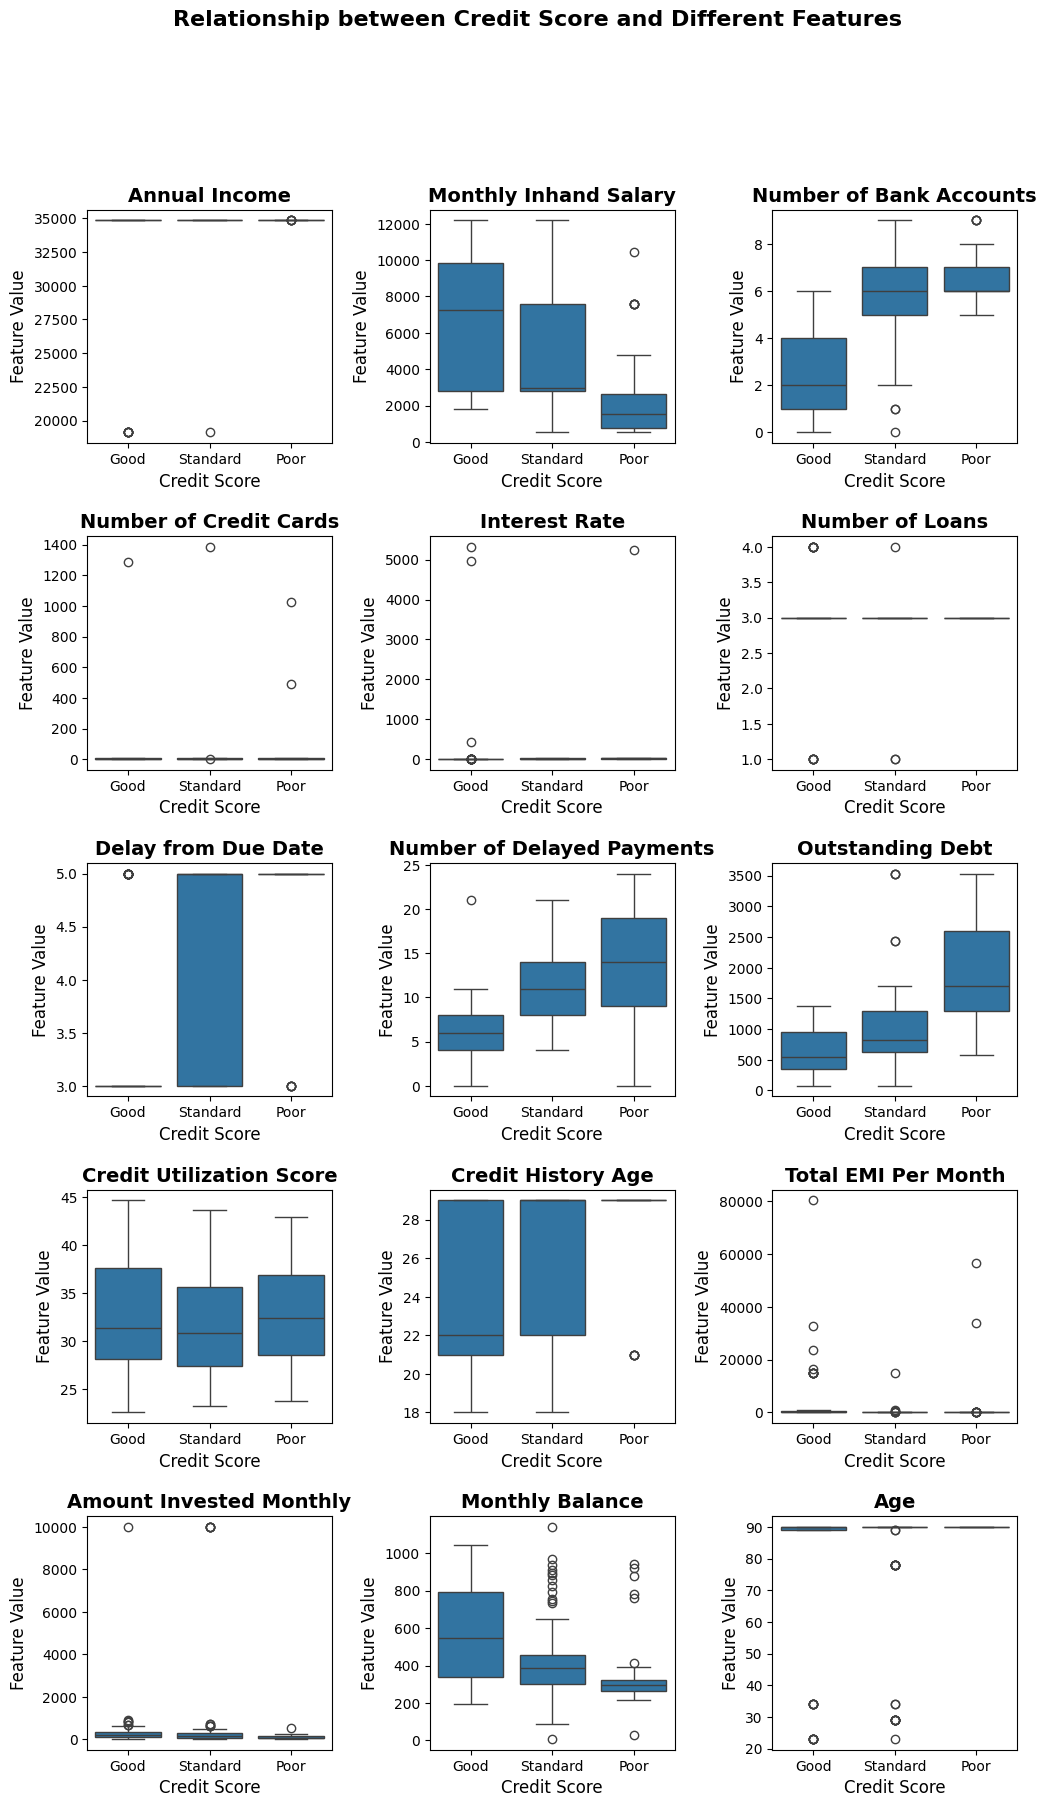

In [14]:
# Create a figure and 2x3 grid of subplots
fig, ax = plt.subplots(5, 3, figsize=(12, 20))

# Flatten the 2D array of subplots into a 1D array
ax = ax.flatten()

# Plot multiple box plots on the same axis
sns.boxplot(x='Credit_Score', y='Annual_Income', data=df, ax=ax[0])
sns.boxplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=df, ax=ax[1])
sns.boxplot(x='Credit_Score', y='Num_Bank_Accounts', data=df, ax=ax[2])
sns.boxplot(x='Credit_Score', y='Num_Credit_Card', data=df, ax=ax[3])
sns.boxplot(x='Credit_Score', y='Interest_Rate', data=df, ax=ax[4])
sns.boxplot(x='Credit_Score', y='Num_of_Loan', data=df, ax=ax[5])
sns.boxplot(x='Credit_Score', y='Delay_from_due_date', data=df, ax=ax[6])
sns.boxplot(x='Credit_Score', y='Num_of_Delayed_Payment', data=df, ax=ax[7])
sns.boxplot(x='Credit_Score', y='Outstanding_Debt', data=df, ax=ax[8])
sns.boxplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=df, ax=ax[9])
sns.boxplot(x='Credit_Score', y='Credit_History_Age', data=df, ax=ax[10])
sns.boxplot(x='Credit_Score', y='Total_EMI_per_month', data=df, ax=ax[11])
sns.boxplot(x='Credit_Score', y='Amount_invested_monthly', data=df, ax=ax[12])
sns.boxplot(x='Credit_Score', y='Monthly_Balance', data=df, ax=ax[13])
sns.boxplot(x='Credit_Score', y='Age', data=df, ax=ax[14])

# Add a title and labels
#plt.title('Relationship between Credit Score and Different Features')
plt.xlabel('Credit Score')
plt.ylabel('Feature Value')

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Add a white grid
for i in range(15):
    ax[i].grid(color='white', linestyle='-', linewidth=2, alpha=0.5)

# Add a title and labels
fig.suptitle('Relationship between Credit Score and Different Features', fontsize=16, fontweight='bold')

# Set the font size for all subplot titles
titles = ['Annual Income', 'Monthly Inhand Salary', 'Number of Bank Accounts', 'Number of Credit Cards', 
          'Interest Rate', 'Number of Loans', 'Delay from Due Date', 'Number of Delayed Payments',
          'Outstanding Debt', 'Credit Utilization Score', 'Credit History Age', 'Total EMI Per Month',
          'Amount Invested Monthly', 'Monthly Balance', 'Age']
for i in range(15):
    ax[i].set_title(titles[i], fontsize=14, fontweight='bold')

    # Set the font size for all x and y labels
for i in range(15):
    ax[i].set_xlabel('Credit Score', fontsize=12)
    ax[i].set_ylabel('Feature Value', fontsize=12)

# Show the plot
plt.show()

In [15]:
# Before transformation
df['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [16]:
#Transforming the column in 0, 1, or 2.
df['Credit_Mix'] = df['Credit_Mix'].map({'Good': 2, 'Standard': 1, 'Bad': 0})

In [17]:
# After transformation
df['Credit_Mix'].unique()

array([2, 1, 0], dtype=int64)

In [18]:
# Importing train_test_split and splitting the data in X (features) and y(target)
from sklearn.model_selection import train_test_split

In [19]:
X = df[["Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate", "Num_of_Loan", 
        "Delay_from_due_date", "Num_of_Delayed_Payment", "Credit_Mix", "Outstanding_Debt", "Credit_History_Age", 
        "Monthly_Balance"]].values
y = df['Credit_Score'].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
model = RandomForestClassifier(n_estimators=300, class_weight='balanced')

In [23]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300)

In [24]:
# Making predictions on our model using the test data
predictions = model.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [26]:
print('Classification Report', classification_report(y_test, predictions))
print('\n')
print('Confusion Matrix', confusion_matrix(y_test, predictions))
print('\n')
print('Accuracy Score', accuracy_score(y_test, predictions))

Classification Report               precision    recall  f1-score   support

        Good       0.87      0.87      0.87        23
        Poor       0.75      0.75      0.75        12
    Standard       0.81      0.81      0.81        31

    accuracy                           0.82        66
   macro avg       0.81      0.81      0.81        66
weighted avg       0.82      0.82      0.82        66



Confusion Matrix [[20  0  3]
 [ 0  9  3]
 [ 3  3 25]]


Accuracy Score 0.8181818181818182
